In [ ]:
pip install svgpathtools


In [ ]:
import numpy as np

def read_csv(file_path):

    np_path_XYs = np.genfromtxt(file_path, delimiter=',')

    path_XYs = []

    for i in np.unique(np_path_XYs[:, 0]):

        npXYs = np_path_XYs[np_path_XYs[:, 0] == i][:, 1:]

        XYs = []

        for j in np.unique(npXYs[:, 0]):

            XY = npXYs[npXYs[:, 0] == j][:, 1:]
            XYs.append(XY)

        path_XYs.append(XYs)

    return path_XYs

path_XYs = read_csv('/content/frag0.csv')


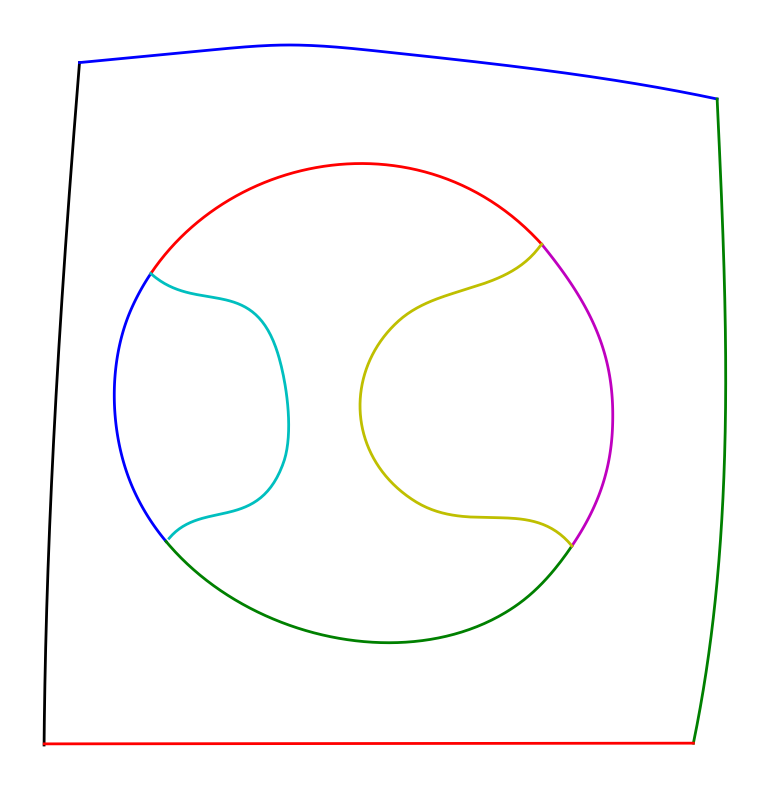

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot(path_XYs):

    colours = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))

    for i, XYs in enumerate(path_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    ax.axis('off')
    plt.show()

    return fig

fig = plot(path_XYs)
fig.savefig('/content/plot_output.svg')


Shape 1: Straight Line
Shape 2: Straight Line
Shape 3: Straight Line
Shape 4: Straight Line
Shape 5: Straight Line
Shape 6: Straight Line
Shape 7: Straight Line
Shape 8: Straight Line
Shape 9: Straight Line
Shape 10: Straight Line
Shape 11: Straight Line
Shape 12: Straight Line
Shape 13: Straight Line
Shape 14: Straight Line
Shape 15: Straight Line
Shape 16: Straight Line
Shape 17: Straight Line
Shape 18: Straight Line
Shape 19: Straight Line
Shape 20: Straight Line
Shape 21: Straight Line
Shape 22: Straight Line
Shape 23: Straight Line
Shape 24: Straight Line
Shape 25: Straight Line
Shape 26: Straight Line
Shape 27: Straight Line
Shape 28: Straight Line
Shape 29: Straight Line
Shape 30: Straight Line
Shape 31: Straight Line
Shape 32: Straight Line
Shape 33: Straight Line
Shape 34: Straight Line
Shape 35: Straight Line
Shape 36: Straight Line
Shape 37: Straight Line
Shape 38: Straight Line
Shape 39: Straight Line
Shape 40: Straight Line
Shape 41: Straight Line
Shape 42: Straight Line
S

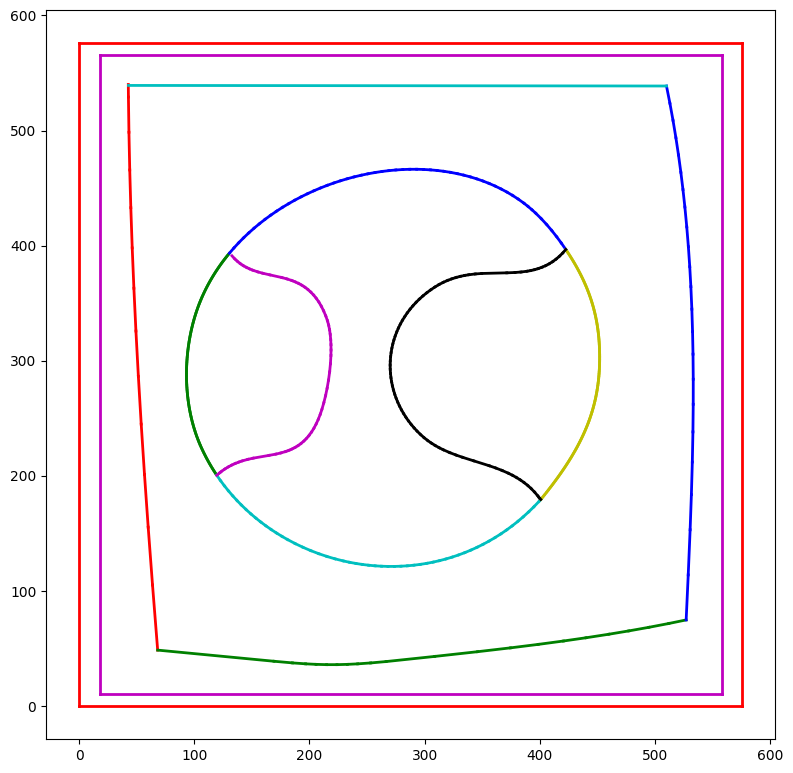

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths, Path, Line, QuadraticBezier, CubicBezier, Arc
import shapely.geometry as sg
def extract_paths_from_svg(svg_path):
    paths, _ = svg2paths(svg_path)
    path_XYs = []

    for path in paths:
        XYs = []
        for segment in path:
            if isinstance(segment, (Line, QuadraticBezier, CubicBezier, Arc)):
                points = np.array([[segment.start.real, segment.start.imag],
                                   [segment.end.real, segment.end.imag]])
                XYs.append(points)
            else:
                print(f"Unhandled segment type: {type(segment)}")
        path_XYs.append(XYs)

    return path_XYs

def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]

    A = np.c_[2*x, 2*y, np.ones_like(x)]
    b = x**2 + y**2

    c = np.linalg.lstsq(A, b, rcond=None)[0]
    center = c[0:2]
    radius = np.sqrt(c[2] + center[0]**2 + center[1]**2)

    return center, radius

def is_circle(points, tolerance=0.1):
    center, radius = fit_circle(points)
    distances = np.linalg.norm(points - center, axis=1)
    return np.std(distances) < tolerance * radius, center, radius

def identify_shapes(path_XYs):
    shapes = []
    for XYs in path_XYs:
        for XY in XYs:
            XY = np.vstack(XY)

            if len(XY) == 2:
                shapes.append("Straight Line")
                continue

            circle_detected, center, radius = is_circle(XY)
            if circle_detected:
                shapes.append("Circle")
                continue


            shapes.append("Unknown Shape")

    return shapes
def plot_regularized_shapes(path_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(path_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            XY = np.vstack(XY)
            if len(XY) == 2:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
                continue

            circle_detected, center, radius = is_circle(XY)
            if circle_detected:
                theta = np.linspace(0, 2 * np.pi, 100)
                x_circle = center[0] + radius * np.cos(theta)
                y_circle = center[1] + radius * np.sin(theta)

                ax.plot(x_circle, y_circle, c=c, linewidth=2)
                continue

            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()

svg_path = '/content/plot_output.svg'
path_XYs = extract_paths_from_svg(svg_path)
shapes = identify_shapes(path_XYs)

for i, shape in enumerate(shapes):
    print(f"Shape {i + 1}: {shape}")

plot_regularized_shapes(path_XYs)


In [50]:
import numpy as np
import matplotlib.pyplot as plt
from svgpathtools import svg2paths, Path, Line, QuadraticBezier, CubicBezier, Arc
from shapely.geometry import Polygon
from shapely.affinity import rotate, translate

def extract_paths_from_svg(svg_path):
    paths, _ = svg2paths(svg_path)
    path_XYs = []

    for path in paths:
        XYs = []
        for segment in path:
            if isinstance(segment, (Line, QuadraticBezier, CubicBezier, Arc)):
                points = np.array([[segment.start.real, segment.start.imag],
                                   [segment.end.real, segment.end.imag]])
                XYs.append(points)
            else:
                print(f"Unhandled segment type: {type(segment)}")
        path_XYs.append(XYs)

    return path_XYs

def fit_circle(points):
    x = points[:, 0]
    y = points[:, 1]

    A = np.c_[2*x, 2*y, np.ones_like(x)]
    b = x**2 + y**2

    c = np.linalg.lstsq(A, b, rcond=None)[0]
    center = c[0:2]
    radius = np.sqrt(c[2] + center[0]**2 + center[1]**2)

    return center, radius

# Function to check if the points form a circle
def is_circle(points, tolerance=0.1):
    center, radius = fit_circle(points)
    distances = np.linalg.norm(points - center, axis=1)
    return np.std(distances) < tolerance * radius, center, radius

# Function to detect basic shapes
def identify_shapes(path_XYs):
    shapes = []
    for XYs in path_XYs:
        for XY in XYs:
            XY = np.vstack(XY)
            if len(XY) == 2:
                shapes.append("Straight Line")
                continue

            circle_detected, center, radius = is_circle(XY)
            if circle_detected:
                shapes.append("Circle")
                continue

            shapes.append("Unknown Shape")

    return shapes

# Functions to detect symmetry types
def detect_reflective_symmetry(points):
    polygon = Polygon(points)
    if not polygon.is_valid:
        print("Invalid polygon for reflective symmetry detection.")
        return False, None

    for angle in np.linspace(0, 180, num=360):
        rotated_polygon = rotate(polygon, angle, origin='centroid')
        if polygon.equals(rotated_polygon):
            return True, angle
    return False, None

def detect_rotational_symmetry(points):
    polygon = Polygon(points)
    if not polygon.is_valid:
        print("Invalid polygon for rotational symmetry detection.")
        return False, None

    for angle in np.linspace(0, 360, num=360):
        rotated_polygon = rotate(polygon, angle, origin='centroid')
        if polygon.equals(rotated_polygon):
            return True, angle
    return False, None

def detect_translational_symmetry(points):
    polygon = Polygon(points)
    if not polygon.is_valid:
        print("Invalid polygon for translational symmetry detection.")
        return False, None

    for dx in np.linspace(-1, 1, num=10):
        for dy in np.linspace(-1, 1, num=10):
            translated_polygon = translate(polygon, xoff=dx, yoff=dy)
            if polygon.equals(translated_polygon):
                return True, (dx, dy)
    return False, None

def plot_regularized_shapes(path_XYs):
    fig, ax = plt.subplots(tight_layout=True, figsize=(8, 8))
    colours = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

    for i, XYs in enumerate(path_XYs):
        c = colours[i % len(colours)]
        for XY in XYs:
            XY = np.vstack(XY)

            if len(XY) == 2:
                ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)
                continue

            circle_detected, center, radius = is_circle(XY)
            if circle_detected:
                theta = np.linspace(0, 2 * np.pi, 100)
                x_circle = center[0] + radius * np.cos(theta)
                y_circle = center[1] + radius * np.sin(theta)
                ax.plot(x_circle, y_circle, c=c, linewidth=2)
                continue

            ax.plot(XY[:, 0], XY[:, 1], c=c, linewidth=2)

    ax.set_aspect('equal')
    plt.show()
def analyze_svg_for_symmetry(svg_path):
    path_XYs = extract_paths_from_svg(svg_path)
    shapes = identify_shapes(path_XYs)

    for i, XYs in enumerate(path_XYs):
        for XY in XYs:
            XY = np.vstack(XY)
            has_reflective_symmetry, angle = detect_reflective_symmetry(XY)
            if has_reflective_symmetry:
                print(f"Shape {i + 1} has reflective symmetry with axis at {angle:.2f} degrees.")

            has_rotational_symmetry, angle = detect_rotational_symmetry(XY)
            if has_rotational_symmetry:
                print(f"Shape {i + 1} has rotational symmetry with angle {angle:.2f} degrees.")

            has_translational_symmetry, translation = detect_translational_symmetry(XY)
            if has_translational_symmetry:
                print(f"Shape {i + 1} has translational symmetry with translation vector {translation}.")

    plot_regularized_shapes(path_XYs)

svg_path = '/content/plot_output.svg'
analyze_svg_for_symmetry(svg_path)


ValueError: A linearring requires at least 4 coordinates.